In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [3]:
# Création d'un dataset réaliste : Comportement clients e-commerce
np.random.seed(42)
n_clients = 500
 
# Génération de données corrélées de manière réaliste
age = np.random.normal(35, 12, n_clients)
age = np.clip(age, 18, 70)  # Limiter l'âge entre 18 et 70
 
# Le revenu augmente généralement avec l'âge (corrélation positive modérée)
revenu = 25000 + (age - 18) * 800 + np.random.normal(0, 8000, n_clients)
revenu = np.clip(revenu, 20000, 120000)
 
# Le temps passé sur le site dépend de l'âge (les plus jeunes passent plus de temps)
temps_site = 45 - (age - 35) * 0.5 + np.random.normal(0, 10, n_clients)
temps_site = np.clip(temps_site, 5, 120)
 
# Le montant des achats dépend du revenu (corrélation forte positive)
montant_achats = revenu * 0.015 + np.random.normal(0, 150, n_clients)
montant_achats = np.clip(montant_achats, 50, 2500)
 
# Le nombre de visites est corrélé au temps passé
nb_visites = temps_site * 0.3 + np.random.normal(0, 3, n_clients)
nb_visites = np.clip(nb_visites, 1, 50)
 
# Le taux de conversion dépend du temps passé et du montant
taux_conversion = 0.05 + (temps_site / 1000) + (montant_achats / 50000) + np.random.normal(0, 0.02, n_clients)
taux_conversion = np.clip(taux_conversion, 0, 0.3)
 
# Score de satisfaction (légèrement corrélé au montant et au temps)
satisfaction = 3.5 + (montant_achats / 1000) * 0.3 + (temps_site / 100) * 0.2 + np.random.normal(0, 0.5, n_clients)
satisfaction = np.clip(satisfaction, 1, 5)
 
# Création du DataFrame
df_clients = pd.DataFrame({
    'age': age.round(0),
    'revenu_annuel': revenu.round(0),
    'temps_site_min': temps_site.round(1),
    'montant_achats_euros': montant_achats.round(2),
    'nb_visites_mois': nb_visites.round(0),
    'taux_conversion': taux_conversion.round(3),
    'score_satisfaction': satisfaction.round(1)
})
 
df_clients.head(10)

,age,revenu_annuel,temps_site_min,montant_achats_euros,nb_visites_mois,taux_conversion,score_satisfaction
0,41.0,50778.0,56.0,878.42,15.0,0.135,2.9
1,33.0,52548.0,55.1,705.54,16.0,0.139,3.4
2,43.0,33629.0,41.7,381.71,10.0,0.093,3.5
3,53.0,57725.0,29.4,865.37,8.0,0.084,4.8
4,32.0,31147.0,53.4,441.68,10.0,0.091,4.0
5,32.0,32455.0,50.3,418.85,16.0,0.092,3.1
6,54.0,49021.0,44.5,839.78,13.0,0.170,4.1
7,44.0,39055.0,46.7,729.13,12.0,0.136,3.0
8,29.0,34481.0,58.3,530.48,19.0,0.092,4.3
9,42.0,37161.0,36.4,779.04,14.0,0.076,3.6


# Calcul des corrélations

## Corrélation entre revenu et le montant des achats

On s'attend à une corrélation positive forte.

In [4]:
corr_revenu_achats = df_clients["revenu_annuel"].corr(df_clients["montant_achats_euros"])
print(f"Coefficient : {corr_revenu_achats:.03f}")

print("Interprétation : ")
if abs(corr_revenu_achats) >= 0.7:
    print(" Corrélation forte")
elif abs(corr_revenu_achats) >= 0.3:
    print(" Corrélation moyenne")
elif abs(corr_revenu_achats) > 0:
    print(" Corrélation faible")
else:
    print(" Pas de corrélation")

if corr_revenu_achats > 0:
    print(" Relation positive : Quand le revenu augmente, les achats augmentent")
elif corr_revenu_achats < 0:
    print(" Relation négative : Quand le revenu augmente, les achats diminuent")

Coefficient : 0.756
Interprétation : 
 Corrélation forte
 Relation positive : Quand le revenu augmente, les achats augmentent


Visualisation de cette corrélation : Scatter plot + Ligne de tendance

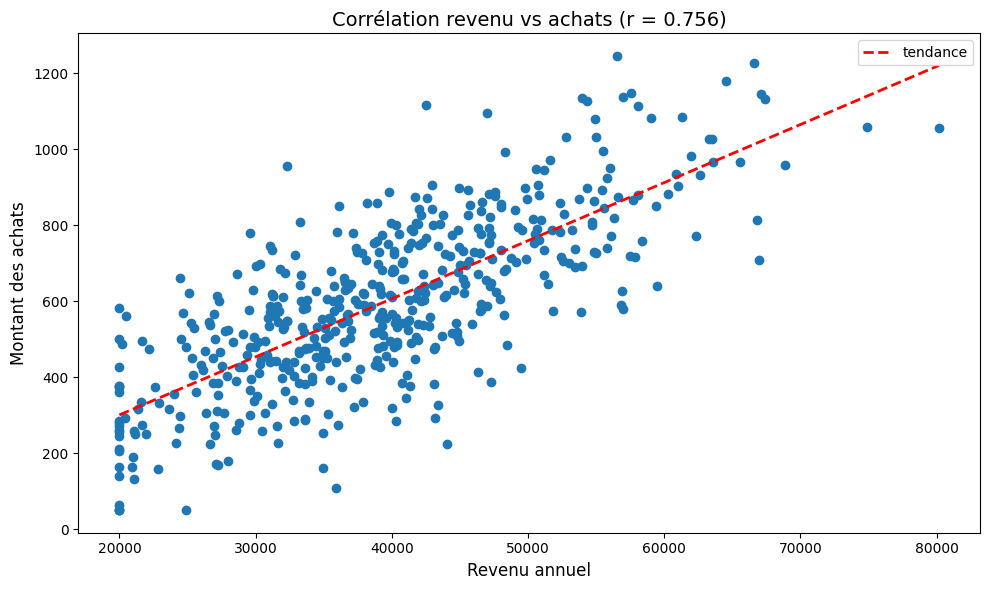

In [5]:
plt.figure(figsize=(10,6))
plt.title(f"Corrélation revenu vs achats (r = {corr_revenu_achats:.03f})", fontsize=14)

# Scatter plot
plt.scatter(df_clients["revenu_annuel"], df_clients["montant_achats_euros"])
plt.xlabel("Revenu annuel", fontsize=12)
plt.ylabel("Montant des achats", fontsize=12)

# Ligne de tendance
z = np.polyfit(x=df_clients["revenu_annuel"], y=df_clients["montant_achats_euros"], deg=1)
p = np.poly1d(z) # Transforme les coefficients de z en polynome
plt.plot(df_clients["revenu_annuel"].sort_values(), p(df_clients["revenu_annuel"].sort_values()), "r--", linewidth=2, label="tendance")
plt.legend()

plt.tight_layout()

## Matrice de corrélation complète

La matrice de corrélation montre les corrélations entre toutes les paires de varialbes

In [6]:
matrice_corr = df_clients.corr()
matrice_corr.round(3)

,age,revenu_annuel,temps_site_min,montant_achats_euros,nb_visites_mois,taux_conversion,score_satisfaction
age,1.000,0.734,-0.519,0.581,-0.409,-0.116,0.076
revenu_annuel,0.734,1.000,-0.340,0.756,-0.260,0.038,0.115
temps_site_min,-0.519,-0.340,1.000,-0.281,0.764,0.444,-0.060
montant_achats_euros,0.581,0.756,-0.281,1.000,-0.251,0.112,0.130
nb_visites_mois,-0.409,-0.260,0.764,-0.251,1.000,0.320,-0.027
taux_conversion,-0.116,0.038,0.444,0.112,0.320,1.000,-0.051
score_satisfaction,0.076,0.115,-0.060,0.130,-0.027,-0.051,1.000


Visualisation des corrélations : Heatmap

- Rouge intense : Corrélation positive forte (0.7 < x < 1)
- blanc : Pas de corrélation (x proche de 0)
- Bleu intense : Corrélation négative forte (-1 < x < -0.7)

<Axes: title={'center': 'Matrice de corrélation - Comportement client E-Commerce'}>

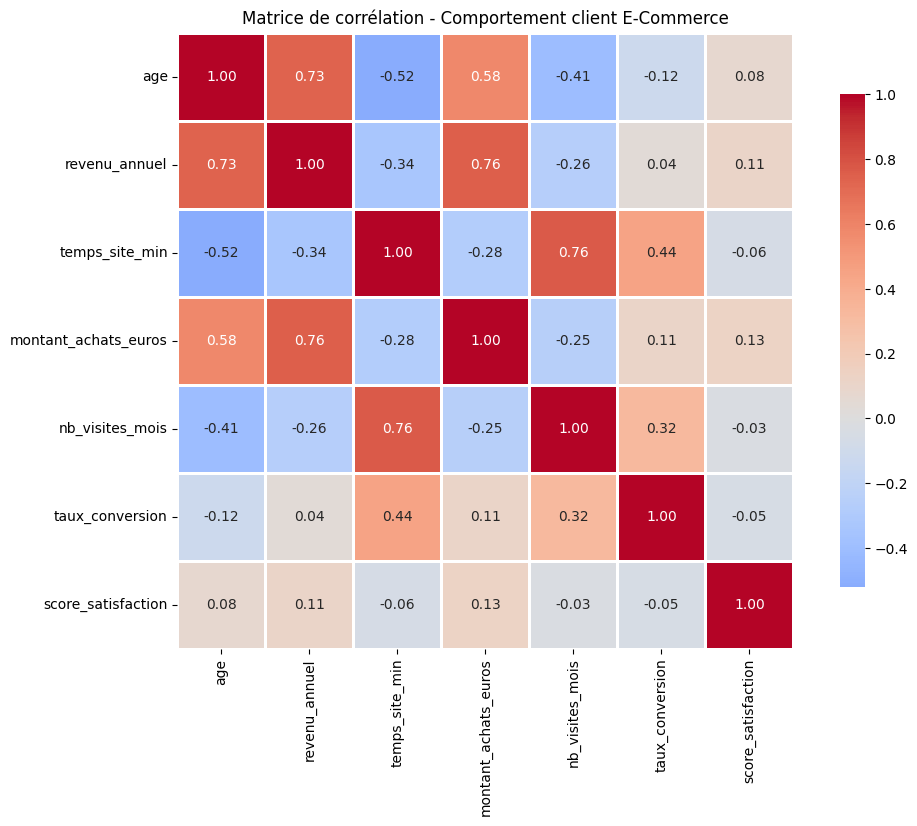

In [7]:
plt.figure(figsize=(12,8))
plt.title("Matrice de corrélation - Comportement client E-Commerce")

sns.heatmap(
    matrice_corr,
    annot=True, # Afficher les valeurs
    cmap="coolwarm",
    center=0,
    square=True, # Cases carrées
    linewidths=1, # Séparation entre les cases
    cbar_kws={"shrink": 0.8}, # Barre de couleur
    fmt=".2f", # Arrondir les valeurs à 2 décimales
)

## Pairplot : Visualisation de toutes les relations

Comment lire le pairplot :
- chaque cellule montre la relation entre deux variables
- la diagonale montre la distribution de chaque variable
- chercher les paternes linéaire (corrélation forte)
- nuage de points dispersés <=> faible corrélation

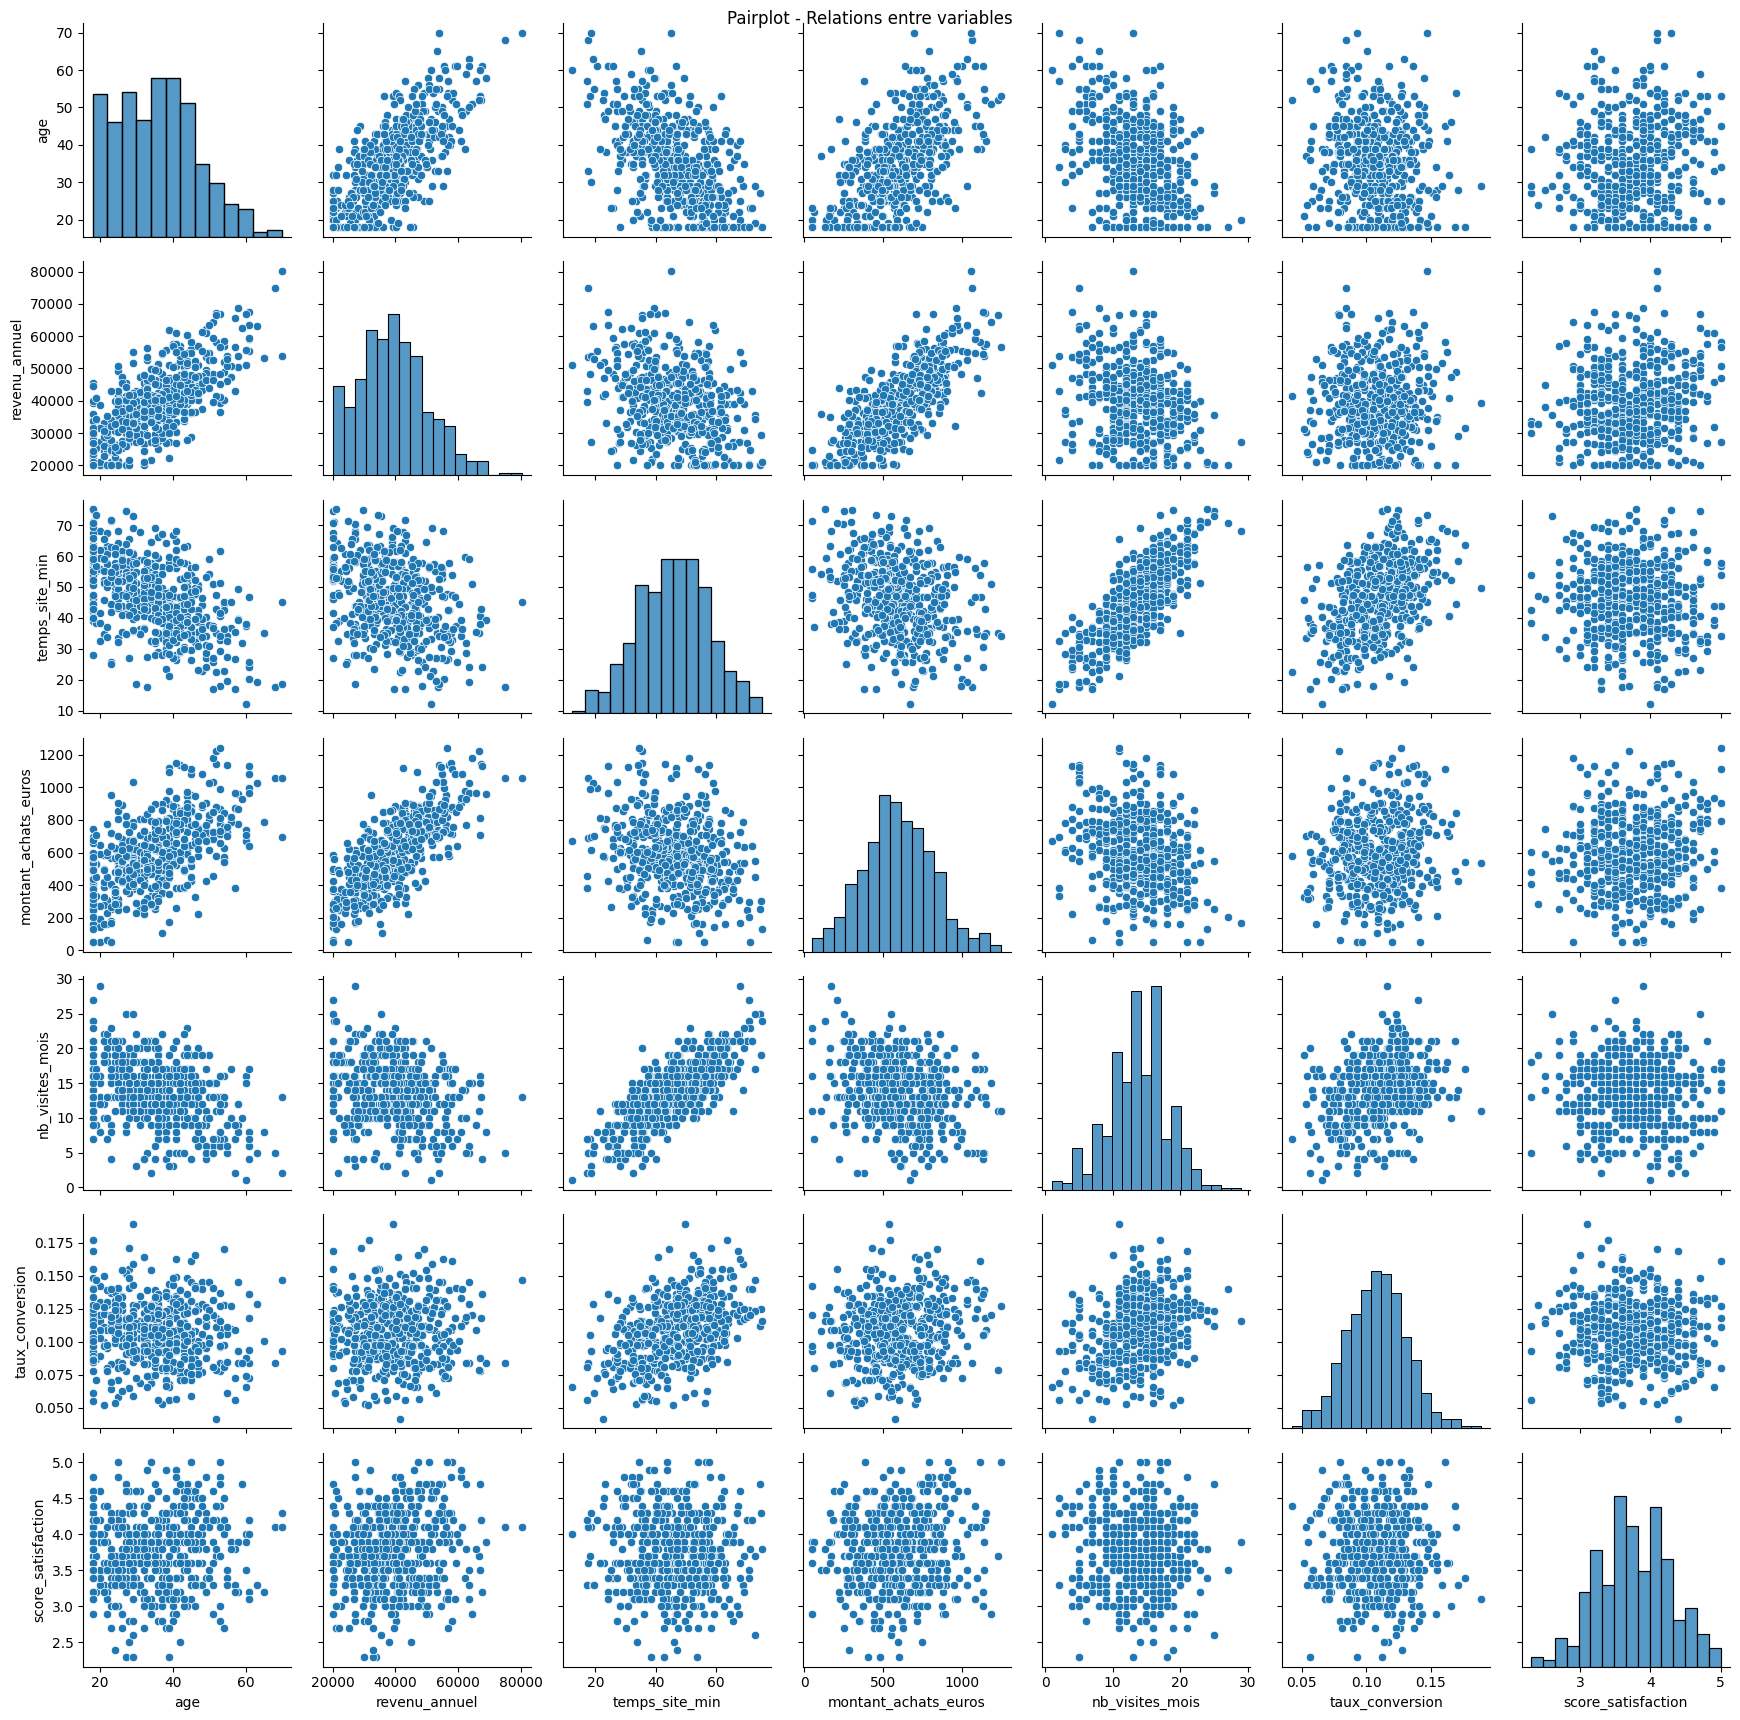

In [8]:
sns.pairplot(df_clients)
plt.suptitle("Pairplot - Relations entre variables")
plt.tight_layout()

## Identifier des corrélations importantes

In [9]:
def find_strong_correlation(mat_corr, threshold=0.5):
    correlations = []
    n, m = mat_corr.shape
    for i in range(n):
        for j in range (i+1, m):
            corr_value = mat_corr.iloc[i, j]
            if abs(corr_value) > threshold:
                correlations.append({
                    "Varialbe 1": mat_corr.index[i],
                    "Varialbe 2": mat_corr.columns[j],
                    "Corrélation": corr_value,
                    "Force": "Forte" if abs(corr_value) > 0.7 else "Modérée"
                })
    return pd.DataFrame(correlations)

df_corr = find_strong_correlation(mat_corr=matrice_corr, threshold=0.7)
df_corr.head()


,Varialbe 1,Varialbe 2,Corrélation,Force
0,age,revenu_annuel,0.733591,Forte
1,revenu_annuel,montant_achats_euros,0.756222,Forte
2,temps_site_min,nb_visites_mois,0.763782,Forte


## Test de significativité

Interprétation :
- si p_value < 0.05 : Il y a moins de 5% de chance que cette corrélation soit due au hasard
- si p_value > 0.05 : Cette corrélation pourrait être due au hasard

In [10]:
corr_value, p_value = pearsonr(df_clients["revenu_annuel"], df_clients["montant_achats_euros"])

print(f"Coefficient de corrélation : {corr_value:.03f}")
print(f"P-value : {p_value:.05f}")

print("Interprétation :")
if p_value < 0.05:
    print(" La corrélation est statistiquement SIGNIFICATIVE")
else:
    print(" La corrélation n'est statistiquement PAS SIGNIFICATIVE")

Coefficient de corrélation : 0.756
P-value : 0.00000
Interprétation :
 La corrélation est statistiquement SIGNIFICATIVE
